<a href="https://colab.research.google.com/github/saamirkc/DeepLearning/blob/main/BatchNormalizaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/drive/MyDrive/concertriccir2.csv')

In [6]:
df.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


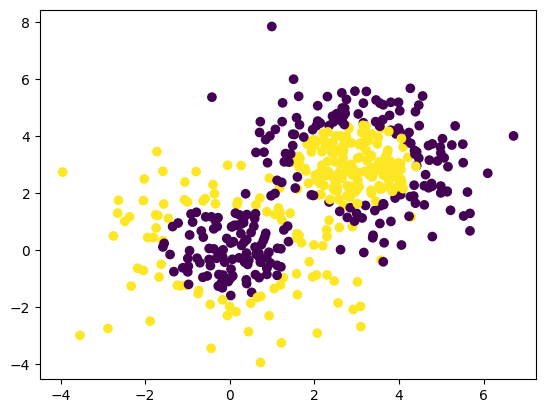

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization


In [11]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history1=model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 28ms/step - loss: 0.6942 - accuracy: 0.4075 - val_loss: 0.6915 - val_accuracy: 0.5500
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.3875 - val_loss: 0.6917 - val_accuracy: 0.5500
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.3925 - val_loss: 0.6921 - val_accuracy: 0.4700
Epoch 4/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.4100 - val_loss: 0.6925 - val_accuracy: 0.4700
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.4350 - val_loss: 0.6928 - val_accuracy: 0.4500
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5200
Epoch 7/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5600 - val_loss: 0.6936 - val_accuracy: 0.5600
Epoch 8/200


In [14]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (Batch  (None, 3)                 12        
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 2s 29ms/step - loss: 0.8888 - accuracy: 0.4725 - val_loss: 1.6127 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 0.8551 - accuracy: 0.4775 - val_loss: 1.3377 - val_accuracy: 0.5600
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.8295 - accuracy: 0.4825 - val_loss: 1.1628 - val_accuracy: 0.5500
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.7947 - accuracy: 0.4950 - val_loss: 1.0412 - val_accuracy: 0.5500
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 0.7635 - accuracy: 0.5175 - val_loss: 0.9524 - val_accuracy: 0.5200
Epoch 6/200
13/13 [==============================] - 0s 9ms/step - loss: 0.7572 - accuracy: 0.5100 - val_loss: 0.8867 - val_accuracy: 0.5000
Epoch 7/200
13/13 [==============================] - 0s 8ms/step - loss: 0.7341 - accuracy: 0.5375 - val_loss: 0.8393 - val_accuracy: 0.4800
Epoch 8/200

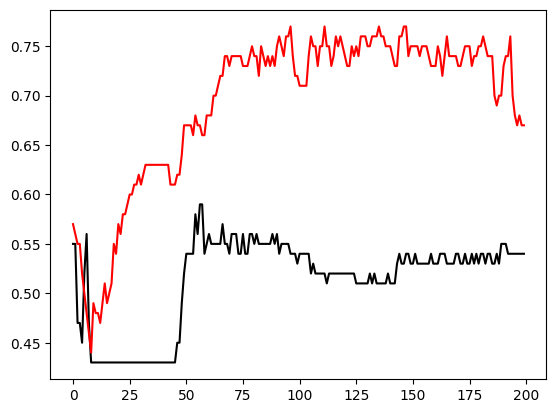

In [18]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='red')

Here red indicates the graph of accuracy for batch normalization and black represents withput batch normalization.We can clearly see that with the use of batch normalization , we can achieve high accuracy with less epochs.
